## 1. Laser intensity profile 

<IPython.core.display.Javascript object>


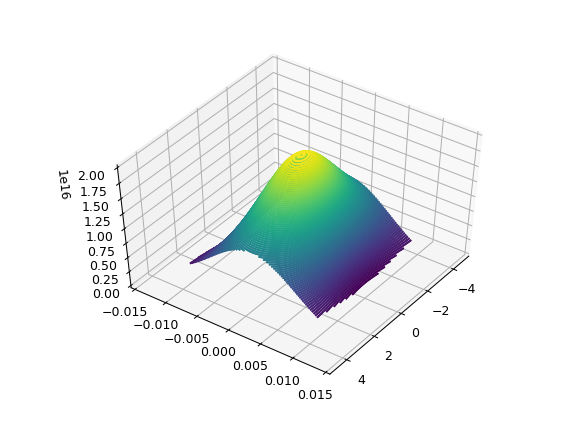

In [14]:
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.widgets import Slider, Button, RadioButtons


r = np.linspace(-0.01,0.01, 100)
z = np.linspace(-3.46, 3.46, 100)

R,Z = np.meshgrid(r,z)

I_0 = 1.945e16
I_ion = 8.78e15
w_0 = 0.00939
Z_R = 3.46
w = w_0*np.sqrt(1+(Z/Z_R)**2)
I = I_0*((w_0/w)**(2))*np.exp((-2*R*R)/(w*w))



fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set(xlim=(-5, 5), ylim=(-0.015, 0.015), zlim = (0, 2e16))

ax.contour3D(Z,R,I, 100)
ax.contour3D(Z,R,I, 100)



# 2. Shape of plasma column

<IPython.core.display.Javascript object>


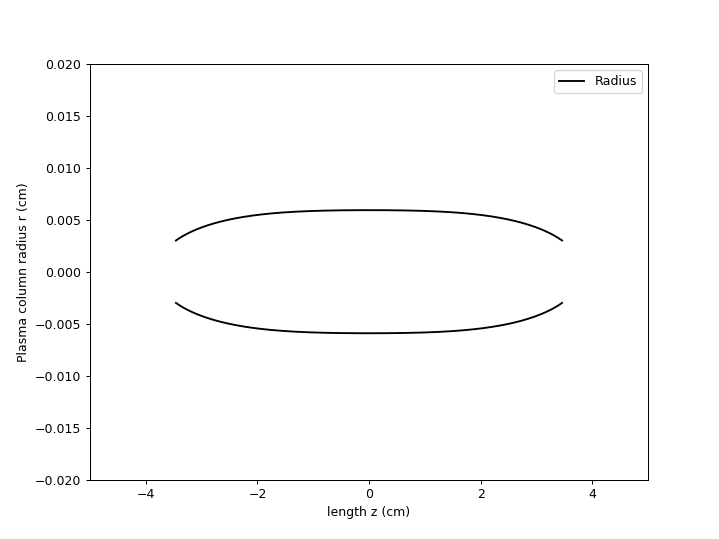

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

fig, ax = plt.subplots(figsize=(8,6))

z = np.linspace(-3.46, 3.46, num=10000) #boundaries set at 1 rayleigh range

I_0 = 1.945e16
I_ion = 8.78e15
w_0 = 0.00939
Z_R = 3.46
w = w_0*np.sqrt(1+(z/Z_R)**2)

rad = np.sqrt(-((w**2)/2)*np.log((I_ion/I_0)*(w/w_0)**2))
rad2 = -rad

L_rad, = ax.plot(z, rad, color='k')
L_rad2, = ax.plot(z, rad2, label='Radius', color='k')

ax.set_xlabel('length z (cm)')
ax.set_ylabel('Plasma column radius r (cm)')
ax.set(xlim=(-5, 5), ylim=(-0.020,0.020))
plt.legend()
plt.show()


    
def updatePlot2(I):
    
    rad = np.sqrt(-((w**2)/2)*np.log((I_ion/I)*(w/w_0)**2))
    rad2 = -rad

    L_rad.set_ydata(rad)
    L_rad2.set_ydata(rad2)
   
    fig.canvas.draw()
   

a2 = widgets.widgets.FloatSlider(
    value=1.945e16,
    min=1.945e15,
    max=1.945e17,
    step=1e15,
    description='Intensity:',
    continuous_update=True,
    readout=True,
)

out = widgets.interactive_output(updatePlot2, {'I': a2})
widgets.HBox([a2, out])
